<a href="https://colab.research.google.com/github/victwise/fastai_numerical_linear_algebra/blob/master/Cap%C3%ADtulo3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Sources

*   https://sites.google.com/site/backgroundsubtraction/test-sequences



In [58]:
!pip install moviepy
!pip install fbpca

  Running setup.py bdist_wheel for fbpca ... - done
  Stored in directory: /root/.cache/pip/wheels/53/a2/dd/9b66cf53dbc58cec1e613d216689e5fa946d3e7805c30f60dc
Successfully built fbpca


In [2]:
import moviepy.editor as mpe
from glob import glob

Imageio: 'ffmpeg-linux64-v3.3.1' was not found on your computer; downloading it now.
Try 1. Download from https://github.com/imageio/imageio-binaries/raw/master/ffmpeg/ffmpeg-linux64-v3.3.1 (43.8 MB)
Downloading: 8192/45929032 bytes (0.0%)696320/45929032 bytes (1.5%)1851392/45929032 bytes (4.0%)3506176/45929032 bytes (7.6%)5898240/45929032 bytes (12.8%)9265152/45929032 bytes (20.2%)12795904/45929032 bytes (27.9%)16711680/45929032 bytes (36.4%)20586496/45929032 bytes (44.8%)24354816/45929032 bytes (53.0%)28139520/45929032 bytes (61.3%)31752192/45929032 bytes (69.1%)35233792/45929032 bytes (76.7%)39116800/

In [0]:
import sys
import numpy as np
import scipy

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt

In [0]:
#MAX_ITERS = 10
Total = 1.0e-8

In [0]:
video = mpe.VideoFileClip("b00000.avi")

In [9]:
video.subclip(0,30).ipython_display(width=300)


100%|█████████▉| 300/301 [00:00<00:00, 1906.08it/s]


In [10]:
video.duration

31.2

##Métodos de Ayuda

In [0]:
def creando_matriz_de_video(clip, k=5, scala=30):
  return np.vstack([scipy.misc.imresize(rgb2gray(clip.get_frame(i/float(k))).astype(int), 
                      scala).flatten() for i in range(k * int(clip.duration))]).T

In [0]:
def rgb2gray(rgb):
  return np.dot(rgb[...,:3],[0.299,0.587,0.114])

In [0]:
def plt_images(M,A,E, index_array, dims, filename=None):
  f = plt.figure(figsize=(15,10))
  r = len(index_array)
  pics = r*3
  for k, i in enumerate(index_array):
    for j, mat in enumerate([M,A,E]):
      sp = f.add_subplot(r,3,3*k+j+1)
      sp.axis('Off')
      pixels = mat[:,i]
      if isinstance(pixels,scipy.sparse.csr_matrix):
        pixels = pixels.todense()
      plt.imshow(np.reshape(pixels,dims),cmap='gray')
  return f

In [0]:
def plots(ims, dims, figsize=(15,20), rows=1, interp=False, titles=None):
    if type(ims[0]) is np.ndarray:
        ims = np.array(ims)
    f = plt.figure(figsize=figsize)
    for i in range(len(ims)):
        sp = f.add_subplot(rows, len(ims)//rows, i+1)
        sp.axis('Off')
        plt.imshow(np.reshape(ims[i], dims), cmap="gray")

##Carga y Visualización de datos

Una imagen de solo 1 momento en el tiempo es de 60 píxeles por 80 píxeles (cuando se escala). Podemos desenrollar esa imagen en una sola columna alta. Así que en lugar de tener una imagen 2D que es 60 × 80, tenemos un 1 × 4 , 800 columna

Esto no es muy fácil de leer, pero nos será útil porque nos permite apilar las imágenes de diferentes momentos una encima de la otra, para poner un video en una sola matriz. Si tomáramos la imagen de video cada décima de segundo durante 30 segundos (por lo que tendríamos 300 imágenes diferentes, cada una en un punto en el tiempo diferente), tendríamos una matriz de 300 × 4800, representando el video!

In [0]:
scala = 70   # Ajuste de la escala para cambiar la resolución de la imagen
dims = (int(120 * (scala/100)), int(160 * (scala/100)))

In [0]:
M = creando_matriz_de_video(video,100,scala)
# M = np.load("alta_resolucion_del_video_en_matriz.npy")

In [17]:
print(dims, M.shape)

(84, 112) (9408, 3100)


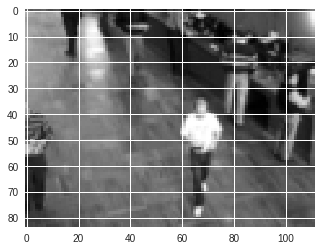

In [18]:
plt.imshow(np.reshape(M[:,3], dims), cmap='gray');

Como "creando_matriz_de_video" es algo lento, guardamos nuestra matriz. En general, siempre que tenga pasos de preprocesamiento lentos, es una buena idea guardar los resultados para un uso futuro.

In [0]:
np.save("baja_res_video_matriz.npy", M)

Nota: La alta resolución M hay veces que es demasiado grande para pasarlo a plot, así que lo mejor es ejecuta una versión resolución baja

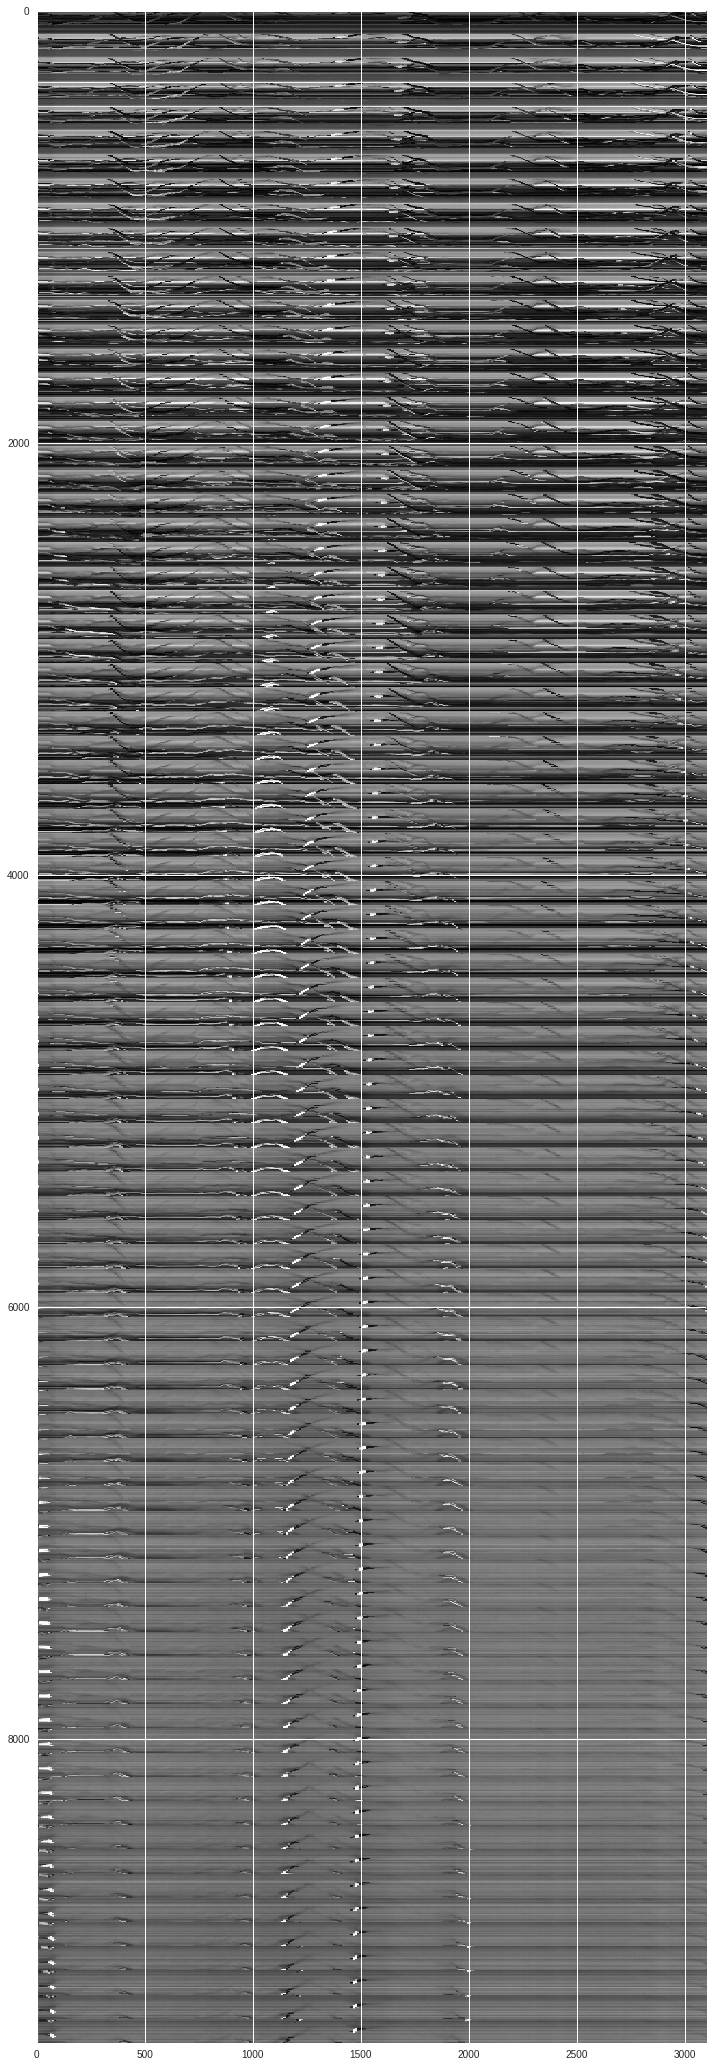

In [22]:
plt.figure(figsize=(12,48))
plt.imshow(M,cmap='gray')

Pregunta: ¿Qué son las ondas negras?¿Qué son las líneas horizontales?

Las líneas blancas son las personas en todo el frame del video, las ondas negras es el fondo del frame.

In [0]:
plt.imsave(fname="image1.jpg", arr=np.reshape(M[:,3], dims), cmap='gray')

##SVD

In [0]:
from sklearn import decomposition

In [0]:
u, s, v = decomposition.randomized_svd(M, 2)

In [26]:
#el método shape nos permite saber las dimensiones del array, ya sea en el eje x, tanto como en el y.
u.shape, s.shape, v.shape

((9408, 2), (2,), (2, 3100))

In [0]:
#diag-> substrae la diagonal del array
low_rank = u @ np.diag(s) @ v

In [29]:
low_rank.shape

(9408, 3100)

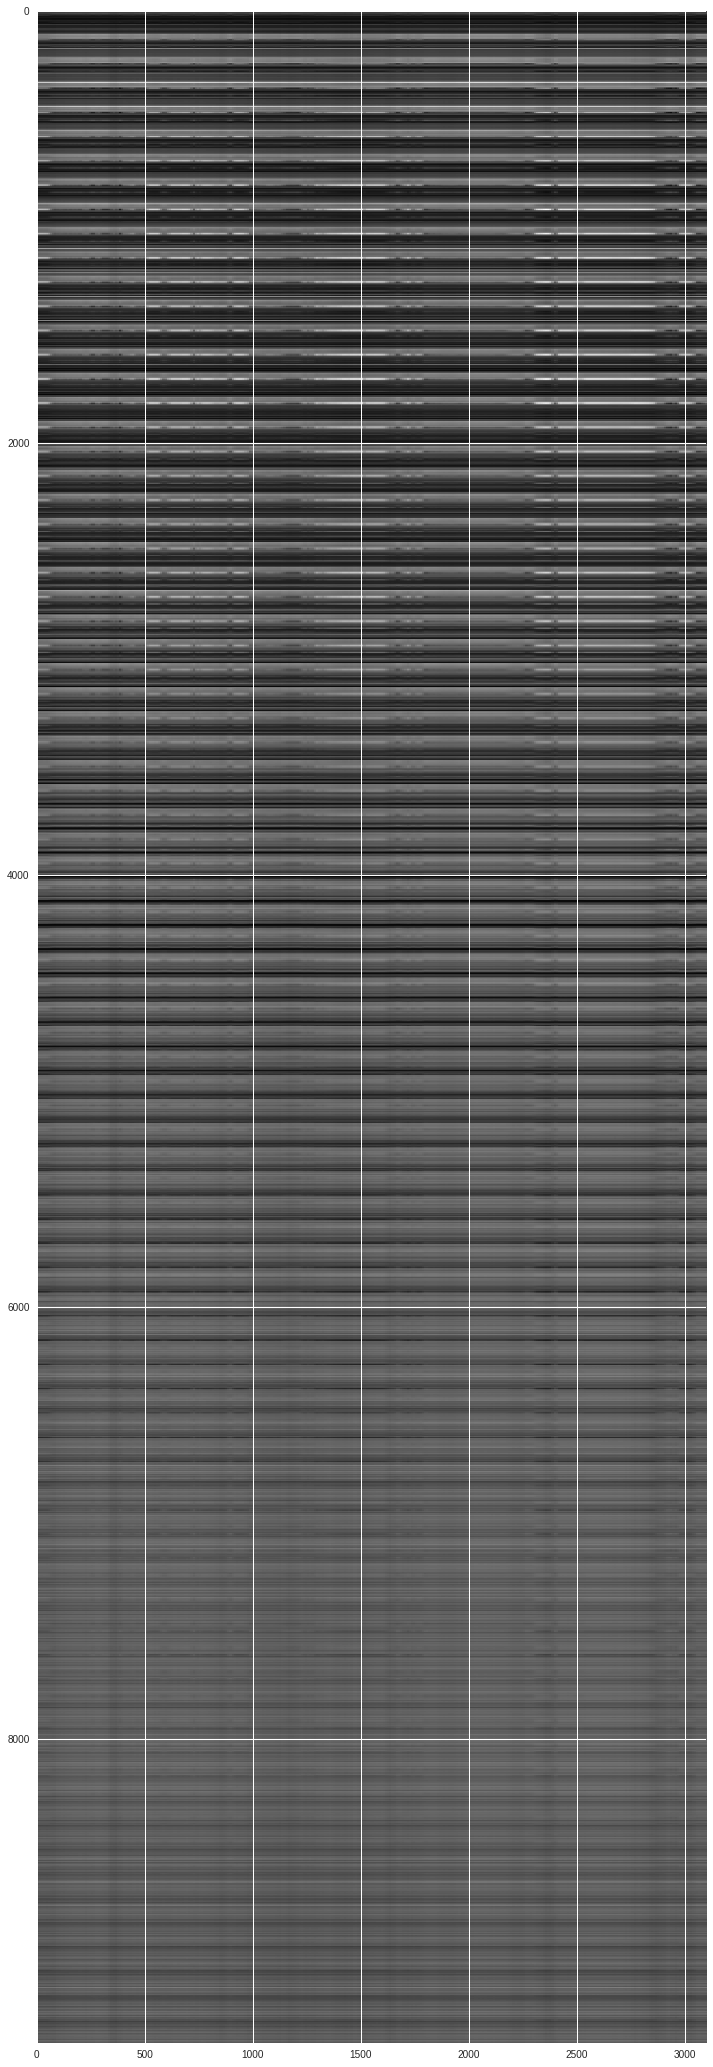

In [31]:
plt.figure(figsize=(12, 48))
plt.imshow(low_rank, cmap='gray')

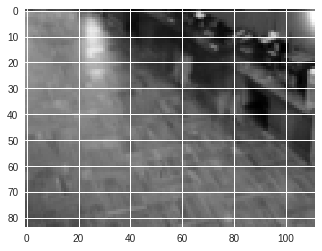

In [34]:
plt.imshow(np.reshape(low_rank[:,3], dims), cmap='gray');

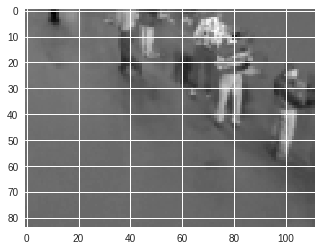

In [35]:
plt.imshow(np.reshape(M[:,550] - low_rank[:,550], dims), cmap='gray');

 Aproximación del Rango 1


In [0]:
u, s, v = decomposition.randomized_svd(M, 1)

In [37]:
u.shape, s.shape, v.shape

((9408, 1), (1,), (1, 3100))

In [0]:
low_rank = u @ np.diag(s) @ v

In [39]:
low_rank.shape

(9408, 3100)

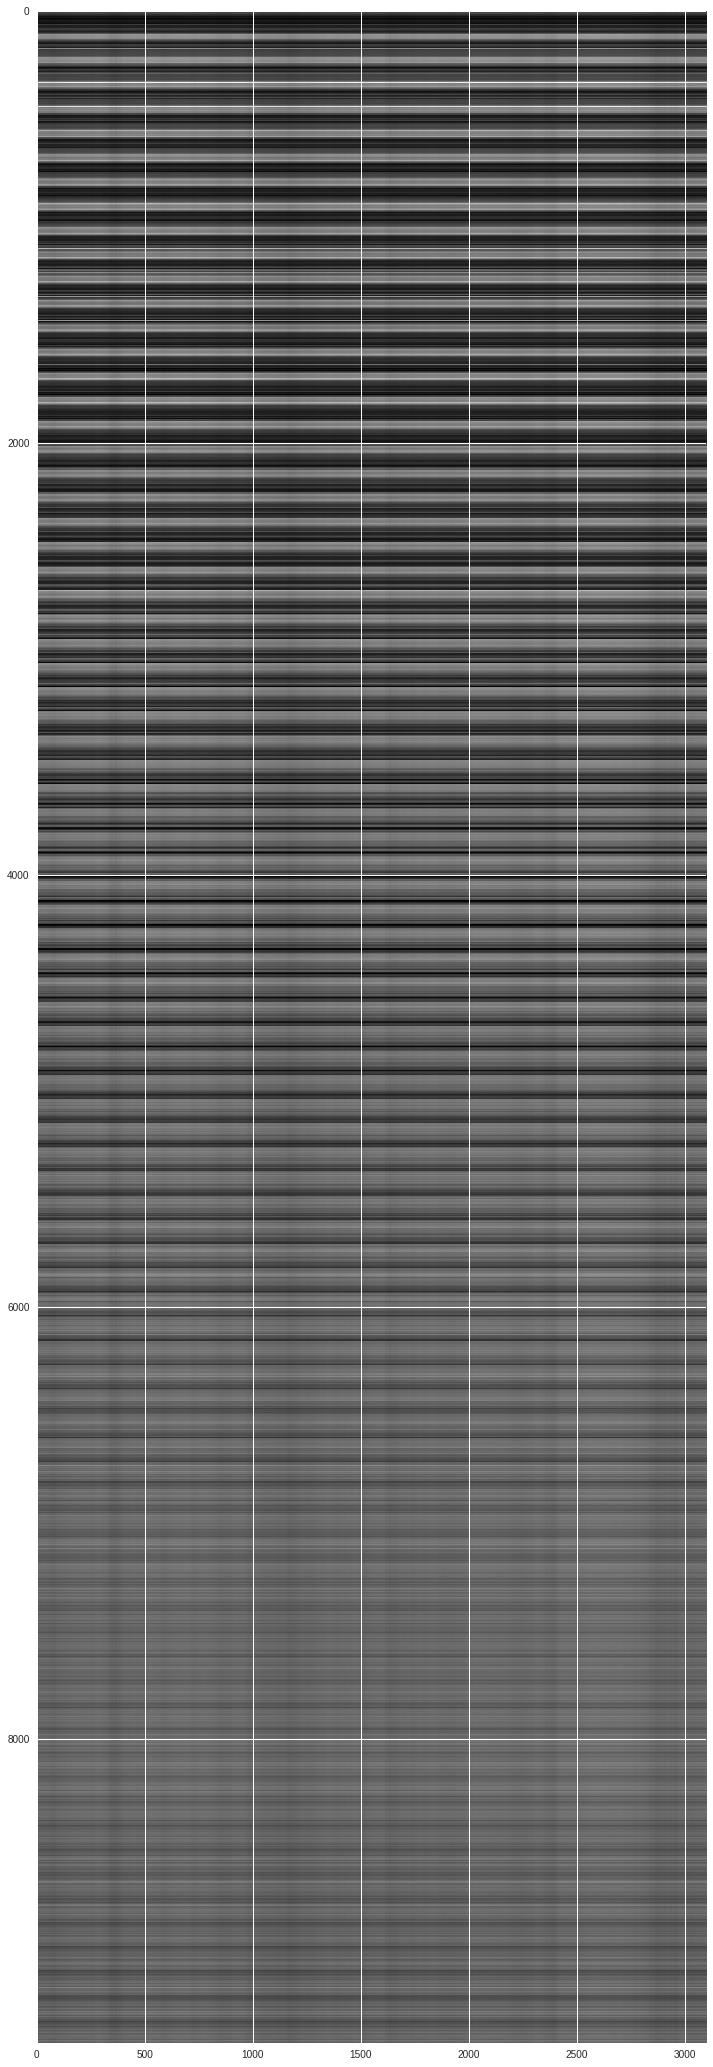

In [40]:
plt.figure(figsize=(12, 48))
plt.imshow(low_rank, cmap='gray')

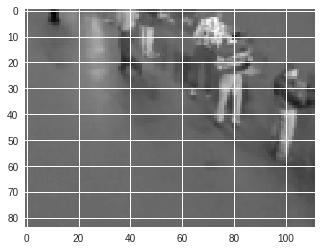

In [41]:
plt.imshow(np.reshape(M[:,550] - low_rank[:,550], dims), cmap='gray');

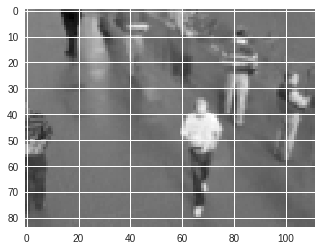

In [43]:
plt.imshow(np.reshape(M[:,3] - low_rank[:,3], dims), cmap='gray');

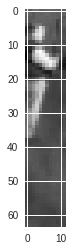

In [55]:
#Haciendo zoom a las personas
plt.imshow(np.reshape(M[:,3] - low_rank[:,3], dims)[20:150,100:270], cmap='gray');

##Análisis de Componentes Principales (PCA)

Cuando se trata de conjuntos de datos de alta dimensión, a menudo aprovechamos el hecho de que los datos tienen una dimensionalidad intrínseca baja para aliviar la maldición de la dimensionalidad y la escala (tal vez se encuentre en un subespacio de baja dimensión o en una variedad de baja dimensión ). El análisis de componentes principales es útil para eliminar dimensiones. La PCA clásica busca el mejor rango- k estimar L de m(minimizando ∥ M - L ∥donde L tiene rango - k). SVD truncado hace este cálculo!

La PCA tradicional puede manejar poco ruido, pero es quebradiza con respecto a las observaciones gravemente corruptas; incluso una observación extremadamente corrupta puede arruinar significativamente la respuesta.

El PCA robusto factoriza una matriz en la suma de dos matrices, M= L + S donde la matriz original, L es de bajo rango , y S es escaso . ¡Esto es lo que usaremos para el problema de eliminación de fondo! **Bajo rango** significa que la matriz tiene mucha información redundante; en este caso, es el fondo, que es el mismo en todas las escenas (¡hable de información redundante!). Disperso significa que la matriz tiene en su mayoría cero entradas; en este caso, vea cómo la imagen del primer plano (la gente) está casi vacía. (En el caso de datos corruptos, S está **capturando las entradas corruptas**).

**Aplicaciones de PCA robusta **

* Video vigilancia.

* Fotos de reconocimiento facial.

* Indización semántica latente: Lcaptura palabras comunes usadas en todos los documentos mientras S captura las pocas palabras clave que mejor distinguen cada documento de otros.

* Clasificación y filtrado colaborativo: una pequeña parte de las clasificaciones disponibles podría ser ruidosa e incluso modificada .

In [0]:
from scipy import sparse
from sklearn.utils.extmath import randomized_svd
import fbpca